In class programming:
1. In the code provided there are three mistake which stop the code to get run successfully;
find those mistakes and explain why they need to be corrected to be able to get the code run
2. Add embedding layer to the model, did you experience any improvement?

In [0]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import io
from google.colab import files

In [0]:
dataFile = files.upload()

Saving imdb_master.csv to imdb_master.csv


In [0]:
df =pd.read_csv(io.StringIO(dataFile['imdb_master.csv'].decode('latin-1')))

In [72]:

df.head(5)

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [73]:
df.label.value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

In [0]:
df = df.drop(df[df.label == 'unsup'].index)

In [75]:
df.label.value_counts()

neg    25000
pos    25000
Name: label, dtype: int64

In [0]:
sentences = df['review'].values
y = df['label'].values

In [0]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [0]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [79]:
len(sentences[0])

2000

In [81]:
len(sentences[0])

2000

In [0]:
#convert data to float and scale values between 0 and 1

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [83]:
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=20, verbose=True, validation_data=(X_test,y_test), batch_size=256)


Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 2s 42us/step - loss: 0.3526 - acc: 0.8494 - val_loss: 0.3061 - val_acc: 0.8732
Epoch 2/20
37500/37500 [==============================] - 1s 33us/step - loss: 0.2654 - acc: 0.8911 - val_loss: 0.2927 - val_acc: 0.8783
Epoch 3/20
37500/37500 [==============================] - 1s 34us/step - loss: 0.2218 - acc: 0.9112 - val_loss: 0.2973 - val_acc: 0.8766
Epoch 4/20
37500/37500 [==============================] - 1s 33us/step - loss: 0.1541 - acc: 0.9468 - val_loss: 0.3032 - val_acc: 0.8761
Epoch 5/20
37500/37500 [==============================] - 1s 34us/step - loss: 0.0871 - acc: 0.9781 - val_loss: 0.3309 - val_acc: 0.8752
Epoch 6/20
37500/37500 [==============================] - 1s 33us/step - loss: 0.0399 - acc: 0.9952 - val_loss: 0.3571 - val_acc: 0.8726
Epoch 7/20
37500/37500 [==============================] - 1s 34us/step - loss: 0.0179 - acc: 0.9990 - val_loss: 0.3792 - val_acc

In [84]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

12500/12500 [==============================] - 1s 62us/step
Evaluation result on Test Data : Loss = 0.5485619051337242, accuracy = 0.876960000038147


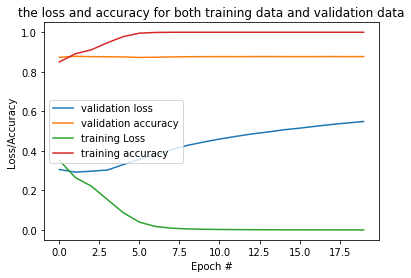

In [88]:
import matplotlib.pyplot as plt

#plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 20), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 20), history.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 20), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 20), history.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [90]:
from keras.layers import Embedding, Flatten
#print(input_dim)
model2 = Sequential()
model2.add(Embedding(2000, 50, input_length=2000))
model2.add(Flatten())
model2.add(layers.Dense(300,input_dim=2000, activation='relu'))
model2.add(layers.Dense(3,activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

history2=model2.fit(X_train,y_train, epochs=20, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model2.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 16s 430us/step - loss: 0.5290 - acc: 0.8021 - val_loss: 0.2993 - val_acc: 0.8781
Epoch 2/20
37500/37500 [==============================] - 15s 413us/step - loss: 0.2844 - acc: 0.8822 - val_loss: 0.2910 - val_acc: 0.8819
Epoch 3/20
37500/37500 [==============================] - 15s 406us/step - loss: 0.2701 - acc: 0.8889 - val_loss: 0.2881 - val_acc: 0.8759
Epoch 4/20
37500/37500 [==============================] - 15s 406us/step - loss: 0.2579 - acc: 0.8936 - val_loss: 0.2897 - val_acc: 0.8791
Epoch 5/20
37500/37500 [==============================] - 15s 410us/step - loss: 0.2476 - acc: 0.8982 - val_loss: 0.2886 - val_acc: 0.8789
Epoch 6/20
37500/37500 [==============================] - 16s 416us/step - loss: 0.2355 - acc: 0.9029 - val_loss: 0.2913 - val_acc: 0.8767
Epoch 7/20
37500/37500 [==============================] - 16s 414us/step - loss: 0.2201 - acc: 0.9090 - val_loss: 0.